In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis

from scipy import stats
from sklearn.decomposition import PCA, FastICA

In [3]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([3,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
#C[3,:]=rayleigh
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

In [4]:
KL_div,SKL_div,JS_div

([array([[ 0.        ,  0.43383806,  0.63576466],
         [ 0.32487544,  0.        ,  0.57640584],
         [ 0.55532802,  0.43988125,  0.        ]]),
  array([[ 0.        ,  0.43383806,  0.63576466],
         [ 0.32487544,  0.        ,  0.57640584],
         [ 0.55532802,  0.43988125,  0.        ]])],
 array([[ 0.        ,  0.43383806,  0.63576466],
        [ 0.32487544,  0.        ,  0.57640584],
        [ 0.55532802,  0.43988125,  0.        ]]),
 array([[ 0.        ,  0.29074558,  0.37830681],
        [ 0.29074558,  0.        ,  0.30514801],
        [ 0.37830681,  0.30514801,  0.        ]]))

In [4]:
A = np.array([[2,1],[3,5]])
B = np.array([[2,1],[5,5]])
print A+B
print np.mean(np.array([A,B]),axis=0)

[[ 4  2]
 [ 8 10]]
[[ 2.  1.]
 [ 4.  5.]]


In [12]:
x = np.loadtxt('FifthMixture100000Stats.txt')
x.shape

(4, 100000)

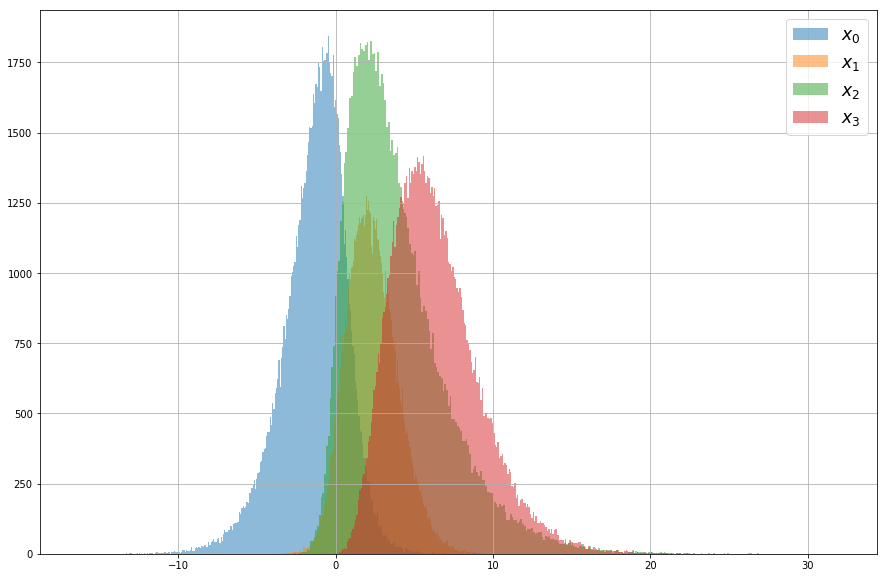

In [13]:
fig, ax = plt.subplots(1,figsize=(15,10))

for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',alpha=.5,label=r'$x_%.f$'%(i))

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [14]:
init_time = time.time()
ica = FastICA(algorithm='deflation',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
y = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 4
Time to converges the FastICA: 17.340 seconds


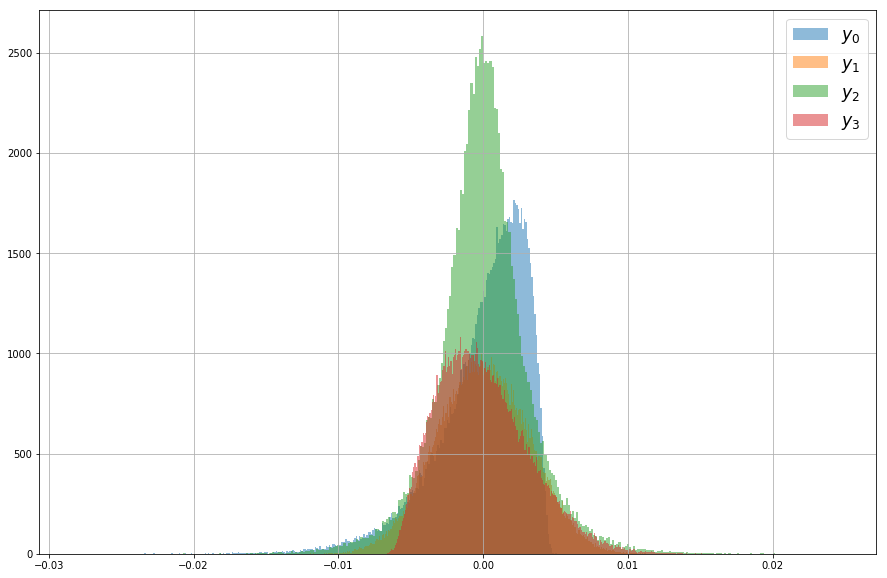

In [15]:
fig, ax = plt.subplots(1,figsize=(15,10))

for i in range(y.shape[0]):
    plt.hist(y[i,:],bins='sqrt',alpha=.5,label=r'$y_%.f$'%(i))


plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


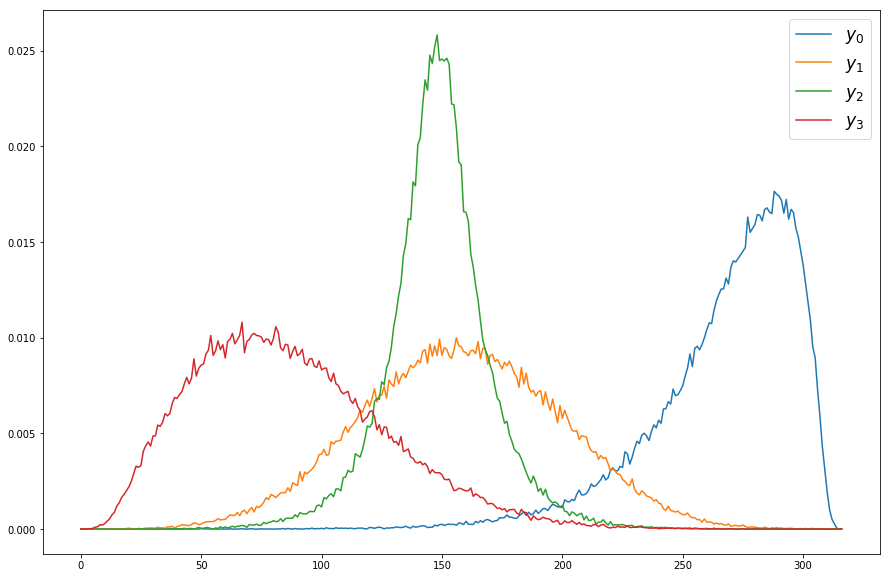

In [16]:
list_pdf = []
for j in range(y.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(y[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))

for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.show()

In [17]:
for i in range(y.shape[0]):
    print 'mean and variance', np.mean(y[i,:]),np.var(y[i,:])

mean and variance 2.40085729075e-20 1e-05
mean and variance 1.96093141724e-18 1e-05
mean and variance 7.96931964864e-20 1e-05
mean and variance 3.99402733109e-19 1e-05


In [18]:
i_stats = y.shape[1]
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(np.mean(y[2,:]),np.std(y[2,:]), i_stats),[1,i_stats])
#uniform = np.reshape(np.random.uniform(-2*np.std(y[2,:]),2*np.std(y[2,:]),i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(np.mean(y[1,:]),np.std(y[1,:]),i_stats),[1,i_stats])
rayleigh = np.reshape(np.random.rayleigh(np.std(y[3,:]), i_stats),[1,i_stats])
chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

s = np.zeros([y.shape[0],i_stats])
#s[2,:] = uniform
s[1,:] = gaus
s[2,:] = laplacian
s[0,:] = chi
s[3,:] = rayleigh

In [19]:
def CreateKLsMatrix(components,sources):
    KL_ida = np.zeros([components.shape[0],components.shape[0]])
    KL_volta = np.zeros([components.shape[0],components.shape[0]])
    for j in range(components.shape[0]):
        for i in range(components.shape[0]):
            KL_ida[i][j]= StatisticalAnalysis.KLDiv(components[i,:],sources[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]
            KL_volta[i][j]= StatisticalAnalysis.KLDiv(sources[i,:],components[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]

    return [KL_ida,KL_volta]

In [20]:
KL_div= CreateKLsMatrix(y,s)

print KL_div

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

In [26]:
KL_values_ida = np.zeros([y.shape[0],y.shape[0]])
KL_values_volta = np.zeros([y.shape[0],y.shape[0]])
for j in range(y.shape[0]):
    for i in range(y.shape[0]):
        KL_values_ida[i][j]= StatisticalAnalysis.KLDiv(y[i,:],s[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]
        KL_values_volta[i][j]= StatisticalAnalysis.KLDiv(s[i,:],y[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]

KL_values_ida,KL_values_volta

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


(array([[ 0.19956545,  0.30548426,  0.34302768],
        [ 0.27597502,  0.07366368,  0.59308916],
        [ 0.31280479,  0.42476951,  0.17537603]]),
 array([[ 0.28662925,  0.42013033,  0.2378844 ],
        [ 0.28326968,  0.11210226,  0.44640326],
        [ 0.5035536 ,  0.7398083 ,  0.1529202 ]]))

In [21]:
#Calculate the Simetric Kullback-Leibler Divergence
def SKLDiv(A,B):
    SKLDiv = np.mean( np.array([ A, B ]), axis=0 )
    return SKLDiv
#np.mean( np.array([ KL_values_ida, KL_values_volta ]), axis=0 )

In [22]:
SKLDiv(KL_div[0],KL_div[1])


array([[ 0.5291786 ,  1.67334731,  1.45098839,  0.84482346],
       [ 1.34910577,  0.18765185,  0.49578885,  0.87334519],
       [ 1.6661693 ,  0.34346986,  0.32129853,  0.8791263 ],
       [ 0.89400415,  1.07688409,  1.33428561,  0.0868634 ]])

In [23]:
def JSDiv(A,B):
    JSDiv = np.zeros([A.shape[0],A.shape[0]])
    for j in range(A.shape[0]):
        for i in range(A.shape[0]):
            M_ij = 0.5*(A[i,:]+B[j,:])
            JSDiv[i][j]=0.5*(StatisticalAnalysis.KLDiv(A[i,:],M_ij,bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0] + StatisticalAnalysis.KLDiv(B[j,:],M_ij,bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0])
            
    return JSDiv

In [24]:
JSDiv(y,s)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

array([[ 0.26846456,  0.85954549,  0.85566357,  1.48543306],
       [ 0.75127164,  0.09853409,  0.29344385,  0.54853657],
       [ 0.85210622,  0.2699534 ,  0.16446408,  0.65537077],
       [ 0.26627792,  0.55793992,  0.74723057,  0.28776892]])

In [25]:
# Calculate the kurtosis
kurtosis = []
for i in range(y.shape[0]):
    kurtosis.append(stats.kstat(y[i,:],4))
print kurtosis

[3.0116461140084519e-10, -1.4784654767959645e-11, 2.5138746764862702e-10, 2.386504513207694e-11]


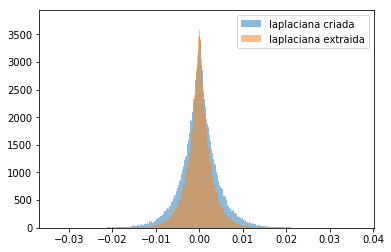

In [44]:
plt.hist(s[0,:],bins='sqrt',alpha=.5,label='laplaciana criada')
plt.hist(y[0,:],bins='sqrt',alpha=.5,label='laplaciana extraida')
plt.legend()
plt.show()

In [80]:
def PDFList(data,bins='sqrt',mode='hist', kernel='epanechnikov', kernel_bw=0.01):
    PDFList = []
    for i in range(data.shape[0]):
        PDFList.append(StatisticalAnalysis.EstPDF(data[j,:],bins=bins,mode=mode,kernel=kernel,kernel_bw=kernel_bw))
    return PDFList
    

In [83]:
PDFList(y,bins='sqrt',mode='hist',kernel='epanechnikov',kernel_bw=0.01)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


[[array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])],
 [array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])],
 [array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])]]

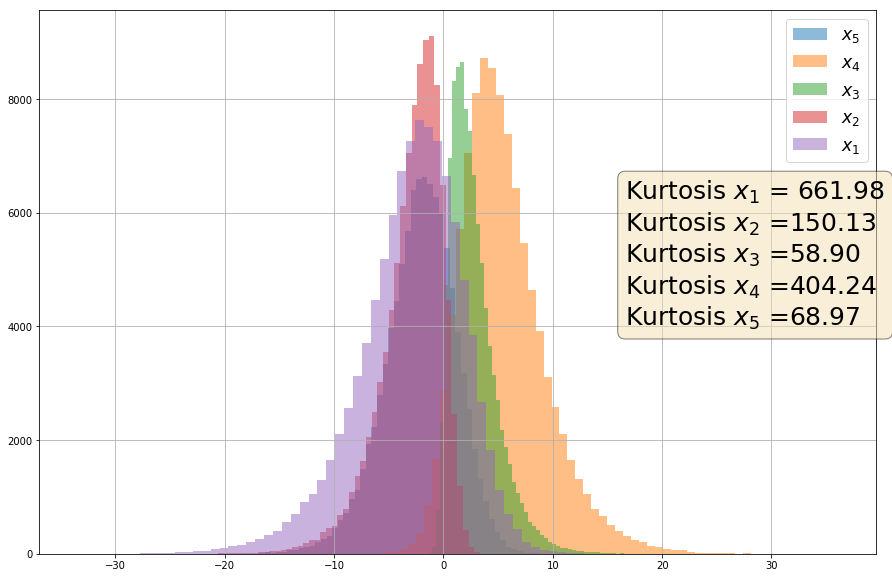

In [86]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(x[0,:],4)
k2 = stats.kstat(x[1,:],4)
k3 = stats.kstat(x[2,:],4)
k4 = stats.kstat(x[3,:],4)
k5 = stats.kstat(x[4,:],4)
textstr = 'Kurtosis $x_1$ = %.2f\nKurtosis $x_2$ =%.2f\nKurtosis $x_3$ =%.2f\nKurtosis $x_4$ =%.2f\nKurtosis $x_5$ =%.2f'%(k1,k2,k3,k4,k5)


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$x_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$x_4$')
plt.hist(x[2,:],bins=60,alpha=.5,label=r'$x_3$')
plt.hist(x[1,:],bins=60,alpha=.5,label=r'$x_2$')
plt.hist(x[0,:],bins=60,alpha=.5,label=r'$x_1$')

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [100]:
ica = FastICA(n_components=x.shape[0],algorithm='parallel',
              whiten=False,fun='cube')
y = ica.fit_transform(x.T)
y = y.T

In [83]:
y.shape

(5, 100000)

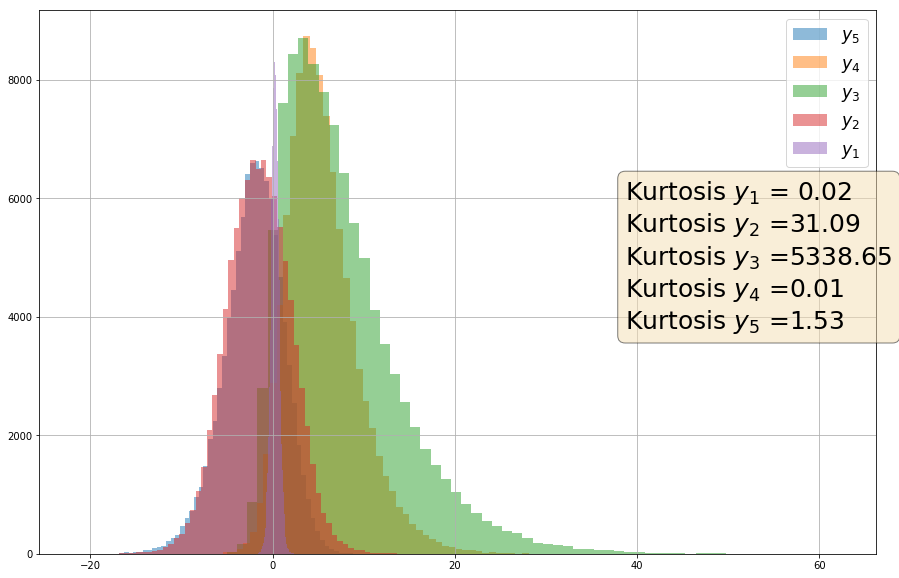

In [101]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(y[0,:],4)
k2 = stats.kstat(y[1,:],4)
k3 = stats.kstat(y[2,:],4)
k4 = stats.kstat(y[3,:],4)
k5 = stats.kstat(y[4,:],4)
textstr = 'Kurtosis $y_1$ = %.2f\nKurtosis $y_2$ =%.2f\nKurtosis $y_3$ =%.2f\nKurtosis $y_4$ =%.2f\nKurtosis $y_5$ =%.2f'%(k1,k2,k3,k4,k5)



props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$y_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$y_4$')
plt.hist(y[2,:],bins=60,alpha=.5,label=r'$y_3$')
plt.hist(y[1,:],bins=60,alpha=.5,label=r'$y_2$')
plt.hist(y[0,:],bins=60,alpha=.5,label=r'$y_1$')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [105]:
l = []
for i in range(3):
    a = i
    l.append(a)
l

[0, 1, 2]